In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_features = pd.read_csv("prepared_data.csv", index_col=0)
df = pd.read_csv("Spam_SMS.csv")
df_features.describe()

,target,char_count,word_count,digit_count,question_count,exclamation_count,dollar_count,cap_ratio,unique_words,repitition_factor,sentiment
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.00000,5574.000000,5574.000000,5525.000000,5574.000000
mean,0.134015,80.445282,7.838536,2.383387,0.278615,0.250628,0.06315,0.065536,7.432723,1.035706,0.192438
std,0.340699,59.841841,5.910006,6.252187,0.646640,0.687338,0.29645,0.109099,5.263184,0.085148,0.396152
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,-0.947700
25%,0.000000,36.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.025641,3.000000,1.000000,0.000000
50%,0.000000,61.000000,6.000000,0.000000,0.000000,0.000000,0.00000,0.037267,6.000000,1.000000,0.000000
75%,0.000000,122.000000,12.000000,1.000000,0.000000,0.000000,0.00000,0.060606,11.000000,1.000000,0.510600
max,1.000000,910.000000,74.000000,47.000000,12.000000,11.000000,3.00000,1.000000,57.000000,2.000000,0.996400


In [3]:
import ast

df_spam_bigrams = pd.read_csv("spam_bigrams.csv", index_col = 0)
df_spam_bigrams = df_spam_bigrams.to_pandas()
df_spam_bigrams["bigram"] = df_spam_bigrams["bigram"].apply(ast.literal_eval)
df_spam_bigrams = pd.DataFrame.from_pandas(df_spam_bigrams)

df_spam_trigrams = pd.read_csv("spam_trigrams.csv", index_col = 0)
df_spam_trigrams = df_spam_trigrams.to_pandas()
df_spam_trigrams["trigram"] = df_spam_trigrams["trigram"].apply(ast.literal_eval)
df_spam_trigrams = pd.DataFrame.from_pandas(df_spam_trigrams)

df_ham_bigrams = pd.read_csv("ham_bigrams.csv", index_col = 0)
df_ham_bigrams = df_ham_bigrams.to_pandas()
df_ham_bigrams["bigrams"] = df_ham_bigrams["bigrams"].apply(ast.literal_eval)
df_ham_bigrams = pd.DataFrame.from_pandas(df_ham_bigrams)

df_ham_trigrams = pd.read_csv("ham_trigrams.csv", index_col = 0)
df_ham_trigrams = df_ham_trigrams.to_pandas()
df_ham_trigrams["trigrams"] = df_ham_trigrams["trigrams"].apply(ast.literal_eval)
df_ham_trigrams = pd.DataFrame.from_pandas(df_ham_trigrams)

AttributeError: 'DataFrame' object has no attribute 'to_pandas'

In [4]:
plt.hist(x = df_features[df_features["target"]==0]["sentiment"].values.get(), bins = 20, alpha = 0.85)
plt.vlines(label = "Median",linestyles='--',x = df_features[df_features["target"] == 0]["sentiment"].median(), ymin=0, ymax=2100, color = 'red')
plt.vlines(label = "Mean",linestyles='-.',x = df_features[df_features["target"] == 0]["sentiment"].mean(), ymin=0, ymax=2100, color = 'black')
plt.title("Distribution of Sentiment Analysis Scores for Ham Messages")
plt.xlabel("Vader Sentiment Score (Compounded)")
plt.ylabel("Frequency of Score")
plt.grid(True, alpha = 0.5, linestyle = '-.')
plt.ylim(0,2100)
plt.legend()
plt.savefig("analysis/ham_sentiment_dist.png")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get'

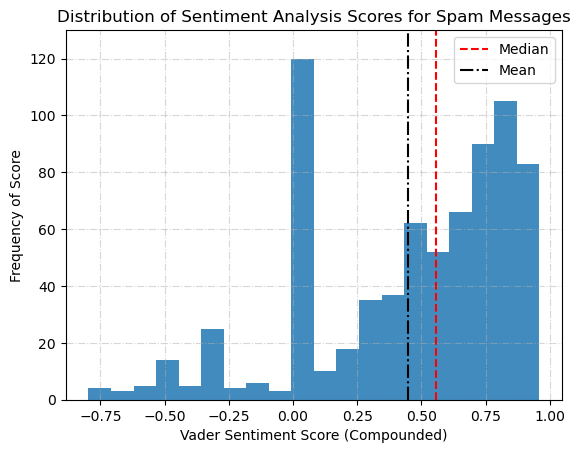

In [ ]:
plt.hist(x = df_features[df_features["target"]==1]["sentiment"].values.get(), bins = 20, alpha = 0.85)
plt.vlines(label = "Median",linestyles='--',x = df_features[df_features["target"] == 1]["sentiment"].median(), ymin=0, ymax=130, color = 'red')
plt.vlines(label = "Mean",linestyles='-.',x = df_features[df_features["target"] == 1]["sentiment"].mean(), ymin=0, ymax=130, color = 'black')
plt.title("Distribution of Sentiment Analysis Scores for Spam Messages")
plt.xlabel("Vader Sentiment Score (Compounded)")
plt.ylabel("Frequency of Score")
plt.ylim(0,130)
plt.grid(True, alpha = 0.5, linestyle = '-.')
plt.legend()
plt.savefig("analysis/spam_sentiment_dist.png")
plt.show()

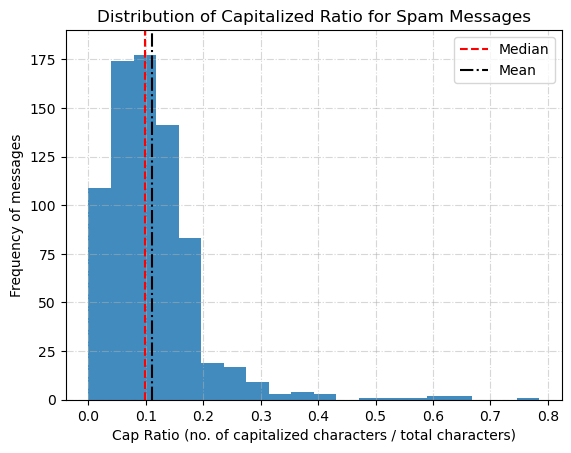

In [ ]:
plt.hist(x = df_features[df_features["target"]==1]["cap_ratio"].values.get(), bins = 20, alpha = 0.85)
plt.vlines(label = "Median",linestyles='--',x = df_features[df_features["target"] == 1]["cap_ratio"].median(), ymin=0, ymax=190, color = 'red')
plt.vlines(label = "Mean",linestyles='-.',x = df_features[df_features["target"] == 1]["cap_ratio"].mean(), ymin=0, ymax=190, color = 'black')
plt.title("Distribution of Capitalized Ratio for Spam Messages")
plt.xlabel("Cap Ratio (no. of capitalized characters / total characters)")
plt.ylabel("Frequency of messages")
plt.ylim(0,190)
plt.grid(True, alpha = 0.5, linestyle = '-.')
plt.legend()
plt.savefig("analysis/spam_cap_ratio.png")
plt.show()

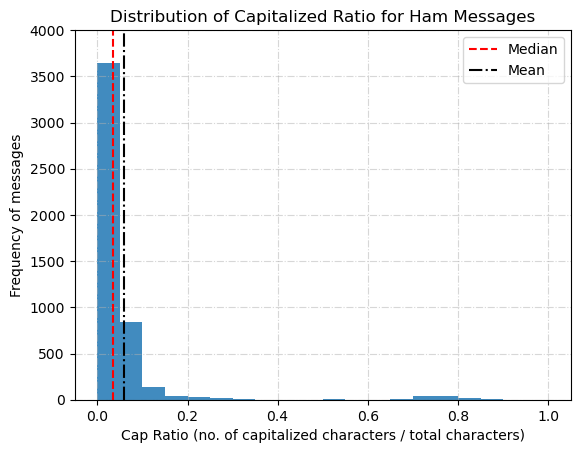

In [10]:
plt.hist(x = df_features[df_features["target"]==0]["cap_ratio"], bins = 20, alpha = 0.85)
plt.vlines(label = "Median",linestyles='--',x = df_features[df_features["target"] == 0]["cap_ratio"].median(), ymin=0, ymax=4000, color = 'red')
plt.vlines(label = "Mean",linestyles='-.',x = df_features[df_features["target"] == 0]["cap_ratio"].mean(), ymin=0, ymax=4000, color = 'black')
plt.title("Distribution of Capitalized Ratio for Ham Messages")
plt.xlabel("Cap Ratio (no. of capitalized characters / total characters)")
plt.ylabel("Frequency of messages")
plt.ylim(0,4000)
plt.grid(True, alpha = 0.5, linestyle = '-.')
plt.legend()
plt.savefig("analysis/ham_cap_ratio.png")
plt.show()

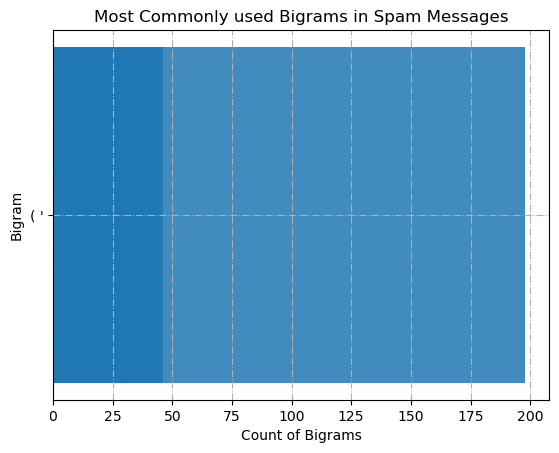

In [12]:
sample = df_spam_bigrams.sort_values(by="count",ascending=False).head(15)
sample["bigram"] = sample["bigram"].apply(lambda x: x[0] + " " + x[1])
plt.barh(y = sample["bigram"].values, width = sample["count"],alpha=0.85)
plt.xlabel("Count of Bigrams")
plt.title("Most Commonly used Bigrams in Spam Messages")
plt.ylabel("Bigram")
plt.grid(True,linestyle='-.')
plt.savefig("analysis/spam_bigrams.png")
plt.show()

In [7]:
df_features = df_features[df_features.describe().columns].fillna(0)

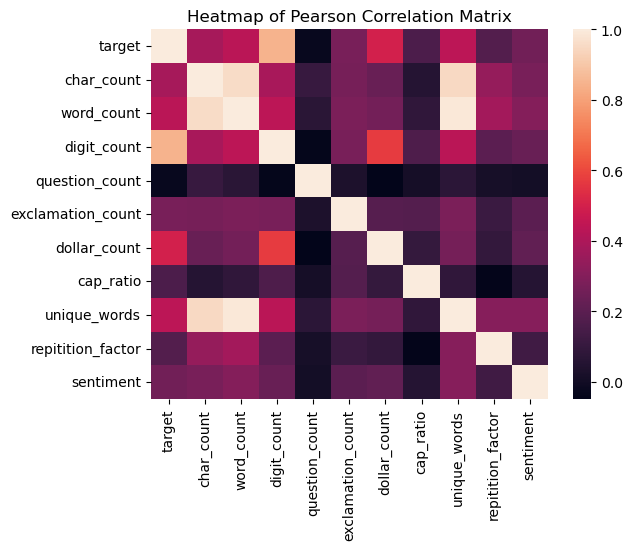

In [8]:
a = df_features[df_features.describe().columns].corr()
sns.heatmap(data = df_features[df_features.describe().columns].corr())
plt.title("Heatmap of Pearson Correlation Matrix")
plt.savefig("analysis/corr_mat.png")

In [9]:
question_proba = []
description = df_features.describe()

for i in range(description["question_count"]["max"].astype(int)):
    values = df.iloc[df_features[df_features["question_count"] > i]["clean_msg"].index,:]["Class"].value_counts()
    try:
        hams = values["ham"]
    except KeyError:
        hams = 0
    
    try:
        spams = values["spam"]
    except KeyError:
        spams = 0
    question_proba.append((spams/(spams + hams))*100)

exclamation_proba = []
for i in range(description["exclamation_count"]["max"].astype(int)):
    values = df.iloc[df_features[df_features["exclamation_count"] > i]["clean_msg"].index,:]["Class"].value_counts()
    try:
        hams = values["ham"]
    except KeyError:
        hams = 0
    
    try:
        spams = values["spam"]
    except KeyError:
        spams = 0
    exclamation_proba.append((spams/(spams + hams))*100)

dollar_proba = []
for i in range(description["dollar_count"]["max"].astype(int)):
    values = df.iloc[df_features[df_features["dollar_count"] > i]["clean_msg"].index,:]["Class"].value_counts()
    try:
        hams = values["ham"]
    except KeyError:
        hams = 0
    
    try:
        spams = values["spam"]
    except KeyError:
        spams = 0
    dollar_proba.append((spams/(spams + hams))*100)

KeyError: 'clean_msg'

In [ ]:
questions = description["question_count"]["max"].astype(int)
exclamation = description["exclamation_count"]["max"].astype(int)
dollar = description["dollar_count"]["max"].astype(int)


plt.plot(range(questions),question_proba, marker='o', label='?')
plt.plot(range(exclamation),exclamation_proba, marker='o', label = "!")
plt.plot(range(dollar),dollar_proba, marker='o', label = "$,£,€")
plt.title("Probability of Spam given number of Special characters in SMS")
plt.ylabel("Probability of Spam (%)")
plt.xlabel("Count of Special character in SMS")
plt.grid(True)
plt.legend()
plt.savefig("analysis/exclamation.png")

NameError: name 'description' is not defined